<a href="https://colab.research.google.com/github/aitormorais/Qiskit/blob/main/generar_caminos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una posible solución es combinar elementos de algoritmos genéticos clásicos con componentes cuánticos para crear un algoritmo híbrido. Por ejemplo, podrías representar la población inicial en un ordenador clásico y utilizar la computación cuántica para acelerar partes específicas del proceso de optimización, como la evaluación de la aptitud, la selección, la cruza y la mutación.

Aquí hay una idea general de cómo podrías diseñar un algoritmo genético cuántico híbrido:

Representación de la población: Inicializa la población de individuos (posibles soluciones) en un ordenador clásico, utilizando una representación adecuada para tu problema específico, como una lista de números binarios, una matriz de adyacencia, etc.

Función de aptitud cuántica: Implementa una función de aptitud cuántica que evalúa el desempeño de los individuos en el problema utilizando un ordenador cuántico. Por ejemplo, podrías diseñar un circuito cuántico que estime la distancia total de un recorrido en un problema del viajante de comercio o la energía de una configuración de espines en un problema de Ising. La función de aptitud cuántica debe ser diseñada para trabajar con Qiskit y otros marcos de computación cuántica.

Selección cuántica: Diseña un operador de selección cuántico que seleccione los mejores individuos de la población para la reproducción, basado en sus valores de aptitud cuántica. Puedes utilizar técnicas de computación cuántica como el algoritmo de Grover para acelerar la búsqueda de los individuos más aptos.

Cruza y mutación cuántica: Implementa operadores de cruza y mutación cuánticos que generen nuevos individuos a partir de los seleccionados en el paso de selección. Puedes utilizar compuertas cuánticas específicas y técnicas de entrelazamiento para combinar y modificar los estados cuánticos de los individuos.

Iteración: Repite los pasos 2 a 4 un número determinado de veces o hasta que se cumpla un criterio de convergencia. Actualiza la población de individuos en cada iteración utilizando los resultados de la selección, cruza y mutación cuántica.

Decodificación de la solución óptima: Una vez que el algoritmo haya convergido, debes decodificar la solución óptima encontrada en el espacio de soluciones cuánticas a una representación clásica que sea interpretable para el problema en cuestión.



In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install qiskit[all]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.9/805.9 kB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.2/186.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble,execute
from qiskit.providers.aer import QasmSimulator
from math import ceil, log2
import networkx as nx

In [ ]:
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.optimization.problems import QuadraticProgram
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit import QuantumRegister, QuantumCircuit, BasicAer
from qiskit.quantum_info import Statevector

ModuleNotFoundError: ignored

Generar Grafo

In [ ]:
n = 6 # número de nodos
G = nx.complete_graph(n) # grafo completo

In [ ]:
type(G.number_of_edges())

int

Vamos a generar los caminos para el qga

In [ ]:
def genera_num(numero_nodos):
  num_qubits = ceil(log2(numero_nodos))
  c=QuantumCircuit(num_qubits,num_qubits)
  c.h(range(num_qubits))
  c.measure(range(num_qubits), range(num_qubits))
  backend = Aer.get_backend('qasm_simulator')
  job = execute(c, backend, shots=1)
  result = job.result()
  # Obtener los conteos de resultados de la ejecución del circuito
  for i in result.get_counts():
    return i[0:num_qubits]

In [ ]:
def generar_camino(numero_nodos):
  lista=[]
  numero=-1
  while len(lista)<=numero_nodos:
    numero=genera_num(numero_nodos)
    if numero not in lista and int(numero,2)<= numero_nodos:
      lista.append(numero)
  return lista

  


In [ ]:
def generar_listas(n,nodos):
    listas = set()
    while len(listas) < n:
        lista = tuple(generar_camino(nodos))
        listas.add(lista)
    return [list(l) for l in listas]

pasar a int

In [ ]:
def pasar_caminobin_int(camino):
  numeros_enteros = []
  for numero_binario in camino:
      numero_entero = int(numero_binario, 2)
      numeros_enteros.append(numero_entero)
  return numeros_enteros


Implementacion de la representacion de qbits

In [ ]:
numero_qbits=G.number_of_edges()#tantos qbits como aristas del grafo

In [ ]:
circuito=QuantumCircuit(numero_qbits)

Seleccion cuantica

Pruebas


In [ ]:

from qiskit import Aer, QuantumCircuit, execute
from qiskit.circuit.library import EfficientSU2, CU3Gate
from qiskit.quantum_info import Statevector
from qiskit.utils import QuantumInstance

# Matriz de adyacencia del grafo
adj_matrix = np.array([[0, 2, 4, 5], [2, 0, 3, 4], [4, 3, 0, 7], [5, 4, 7, 0]])

# Número de ciudades
num_cities = adj_matrix.shape[0]

# Peso máximo en la matriz de adyacencia
max_weight = np.max(adj_matrix)



In [ ]:
adj_matrix

array([[0, 2, 4, 5],
       [2, 0, 3, 4],
       [4, 3, 0, 7],
       [5, 4, 7, 0]])

In [ ]:
num_cities

4

In [ ]:
# Creamos un circuito cuántico que implementa un algoritmo de estimación de fase
# que estima la fase correspondiente a la distancia total del recorrido
qc = QuantumCircuit(num_cities)

# Preparamos el estado inicial |s>
qc.h(range(num_cities))

# Aplicamos una capa de puertas EfficientSU2
qc.compose(EfficientSU2(num_cities, reps=1), range(num_cities))

# Aplicamos una capa de operadores de rotación
for i in range(num_cities):
    for j in range(i):
        weight = adj_matrix[i][j]
        theta = 2 * np.arcsin(np.sqrt(weight/max_weight))
        k = (i + j + 1) % num_cities
        while k == i or k == j:  # Incrementamos k si es igual a i o j
            k = (k + 1) % num_cities
        qc.append(CU3Gate(theta, 0, 0).control(), [i, j, k])

# Aplicamos una capa de Hadamards
qc.h(range(num_cities))

# Medimos el estado del circuito
qc.measure_all()



In [ ]:
# Ejecutamos el circuito en un simulador cuántico
#simulator = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend("qasm_simulator")
job = execute(qc,backend,shots = 1024)
result = job.result()

# Calculamos la distancia total estimada a partir de los resultados de la medición
counts = result.get_counts(qc)
distances = [int(k[::-1], 2) for k in counts.keys()]
total_distance_est = np.mean(distances)

In [ ]:
distances

[13, 8, 15, 7, 11, 12, 14, 0, 4, 5, 2, 6, 1, 10, 9]

In [ ]:
camino = generar_camino(G.number_of_edges())

In [ ]:
cam=pasar_caminobin_int(camino)

In [ ]:
estado=transformar_a_estado_cuantico(cam,G)

numqbits 16
9
11
0
7
2
14
3
6
15
13
5
12
10
1
8
4


In [ ]:
estado

Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [ ]:
estado

Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


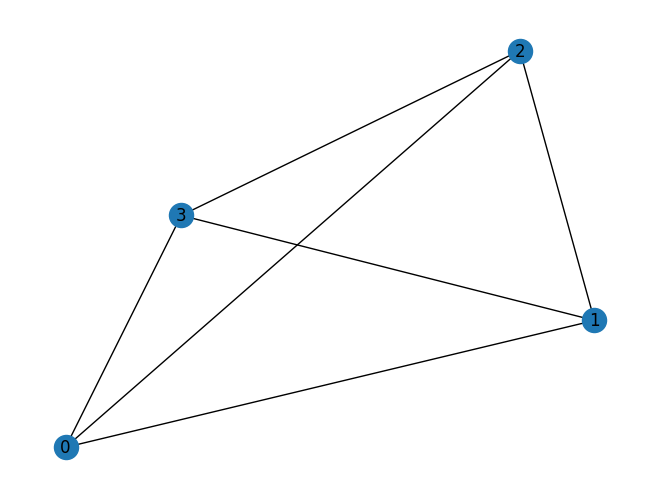

In [ ]:
import networkx as nx
import random

G = nx.Graph()

G.add_nodes_from([0, 1, 2, 3])
for i in range(4):
    for j in range(i + 1, 4):
        G.add_edge(i, j, weight=random.randint(1, 10))

nx.draw(G, with_labels=True)


In [ ]:
import numpy as np

adj_matrix = np.zeros((4, 4))

for i, j, weight in G.edges.data('weight'):
    adj_matrix[i][j] = weight
    adj_matrix[j][i] = weight

print(adj_matrix)


[[ 0.  5.  1.  6.]
 [ 5.  0.  4. 10.]
 [ 1.  4.  0.  8.]
 [ 6. 10.  8.  0.]]


In [ ]:
pip install qiskit-aqua

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Inicializar los qubits:*** 

Aplica una puerta de Hadamard (H) a cada qubit para inicializarlos en una superposición de los estados |0> y |1>. Esto representa todas las combinaciones posibles de aristas incluidas y excluidas.